In [248]:
# import all the models 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV,Lasso,Ridge,RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [249]:
# read files 
facts = pd.read_csv('Hitters.csv')

In [250]:
facts.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [251]:
# drop all ther category columns
facts=facts.drop(['League','Division','NewLeague','Unnamed: 0'],axis=1)

In [252]:
facts.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [253]:
facts.shape

(322, 17)

In [254]:
# check if null value exists
checknull=facts['Salary'].isnull()
check=set(checknull)
check

{False, True}

In [255]:
# drop all the lines with null value
facts=facts.dropna()

In [256]:
facts.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [257]:
# dataframe after deleting lines with the null value 
facts.shape

(263, 17)

In [258]:
# split the dataset to a train set and a test set
train, test = train_test_split(facts, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [259]:
# get the matrix and the label for the train set 
X_train=train.drop(['Salary'],axis=1)
y_train=train['Salary']

In [260]:
# get the matrix and the label for the test set 
X_test=test.drop(['Salary'],axis=1)
y_test=test['Salary']

In [261]:
# get features that is to be scaled 
features = X_train.columns.values
features=list(features)

features

In [264]:
# X_train, y_train after scaling 

scaler =  StandardScaler()

X_train = scaler.fit_transform(X_train[features])
y_train=scaler.fit_transform(y_train.values.reshape(-1,1))

array([[ 1.00043399,  0.67991177, -1.10503803, ..., -0.1416809 ,
         2.4531718 ,  2.1359746 ],
       [-0.72361889, -0.73534822, -0.64845567, ..., -0.30392177,
        -0.80035914, -1.01620155],
       [ 1.25765155,  1.15927402,  0.37885465, ...,  0.09009177,
        -0.66538733, -0.70098393],
       ...,
       [ 0.75016825,  0.70273854,  1.52031056, ..., -0.48602887,
        -0.75773646, -0.0705487 ],
       [-0.41773854, -0.09619855, -0.64845567, ..., -0.30723281,
        -0.40965128,  0.71749533],
       [ 0.29134772, -0.18750564, -1.21918362, ..., -0.08539325,
         2.14060551,  1.19032175]])

In [265]:
# X_test after scaling 
X_test= scaler.fit_transform(X_test[features])


# y_test after scaling 
y_test=scaler.fit_transform(y_test.values.reshape(-1,1))

In [425]:
# before using lasso and ridge, use the linear regression to make predications 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

model = LinearRegression()
model.fit(X_train, y_train)
MSE_train = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
MSE_test = cross_val_score(model, X_test, y_test, scoring = 'neg_mean_squared_error', cv = 5)
mean_MSE_train = np.mean(MSE_train)
mean_MSE_test = np.mean(MSE_test)


In [426]:

# use mse to see the fit score for training set 
print('fit score for train set:')
print(mean_MSE_train)

# use mse to see the fit score for test set 
print('fit score for test set:')
print(mean_MSE_test)


fit score for train set:
-0.5658590102598029
fit score for test set:
-1.148533494331932


In [266]:
# lasso regression, when alpha is 0.1
lasso=Lasso(alpha=0.1)

In [401]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [402]:
# use mse to see the fit score for train set 
print('fit score for train set:')
fit_score_train = np.sqrt(mean_squared_error(y_train,lasso.predict(X_train)))
print(fit_score_train)
# use mse to see the fit score for test set 
print('fit score for test set:')
fit_score_test = np.sqrt(mean_squared_error(y_test,lasso.predict(X_test)))
print(fit_score_test)


fit score for train set:
0.7031285476125747
fit score for test set:
0.8924490802992284


In [403]:
# lasso alpha exploration
alphas = np.logspace(-4, 20, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))

fit_score_train = np.zeros_like(alphas)
fit_score_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha,random_state=42)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    fit_score_train[n] = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
    fit_score_test[n] = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.477577530560737, tolerance: 0.020999999999999994
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.713546872350221, tolerance: 0.020999999999999994
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07986790963161639, tolerance: 0.020999999999999994
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not

/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.4775775305607, tolerance: 0.020999999999999994
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.18206899137798, tolerance: 0.020999999999999994
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.898737549744439, tolerance: 0.020999999999999994
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not con

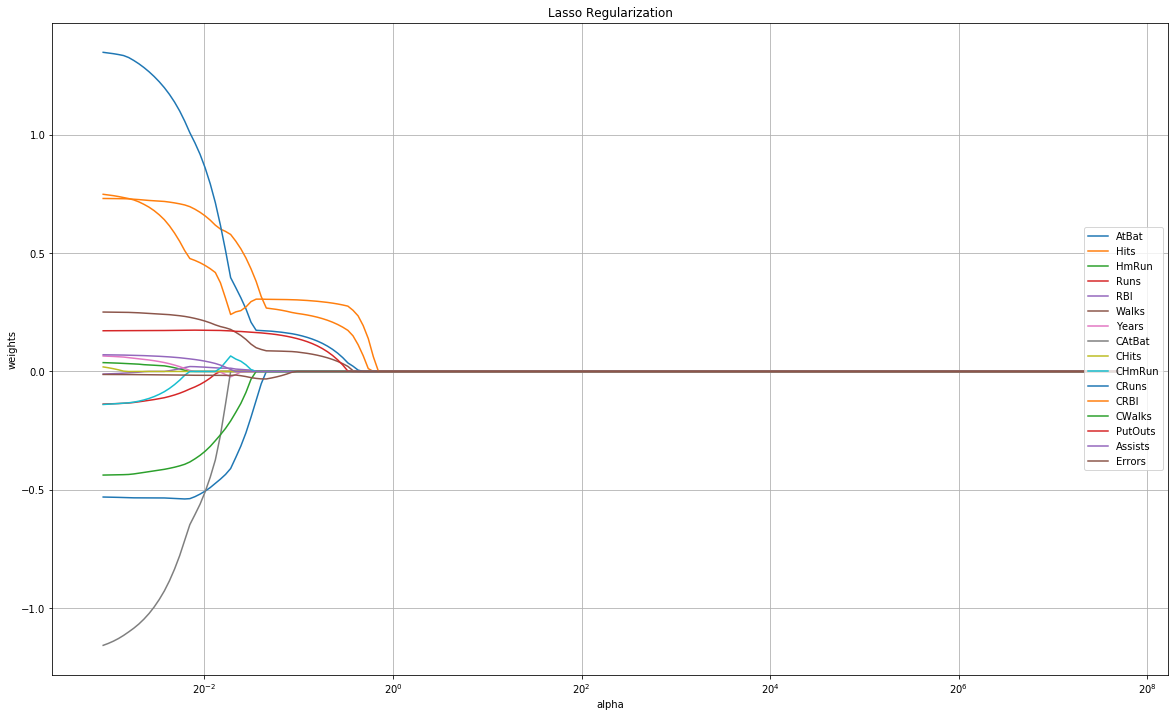

In [436]:
alphas = np.logspace(-4, 10, 200)

coefs = []

for a in alphas:
    lasso_vis = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso_vis.fit(X_train, y_train)
    coefs.append(lasso_vis.coef_)

# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log', basex = 20)
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso Regularization')
plt.axis('tight')
plt.grid(True)
plt.legend(features, loc = 'right')
fig = plt.gcf()
fig.set_size_inches(20, 12)
fig.savefig('test2png.png', dpi=100)
plt.show()

# Answer

## Q: Comment on which are the final three predictors that remain in the model.  

## A: The last three predictors that remain in the model are AtBat, Hits and CRBI. 

In [427]:
# use cross validaton to explore the best penalties 

reg = LassoCV(random_state=42,cv=10)

reg.fit(X_train, y_train)


/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=42, selection='cyclic',
        tol=0.0001, verbose=False)

In [428]:
lasso_cv_train=reg.predict(X_train)
lasso_cv_test=reg.predict(X_test)

In [429]:
# by setting the cv as 10, the model fit and predict and automatically generate the alpha, which is 0.0039
reg.alpha_

0.003928109879302476

# Answer:

## By setting the cv as 10, the model fits, predicts and automatically generates the alpha, which is 0.0039

## the gridsearch shows that the alpha is 0.01 

In [438]:
reg.coef_

array([-0.46075565,  0.60437496,  0.        , -0.        ,  0.01399741,
        0.19112616, -0.        , -0.30856712,  0.        ,  0.00651493,
        0.64921985,  0.39400968, -0.27544519,  0.17334971,  0.02943407,
       -0.01640894])

# Answer :

## Four coeffients are zero, so 12 predictors left in the model. 

In [435]:
# use mse to see the fit score for train set 
print('fit score for train set:')
fit_score_train = np.sqrt(mean_squared_error(y_train,reg.predict(X_train)))
print(fit_score_train)
# use mse to see the fit score for test set 
print('fit score for test set:')
fit_score_test = np.sqrt(mean_squared_error(y_test,reg.predict(X_test)))
print(fit_score_test)


fit score for train set:
0.6613095062437823
fit score for test set:
0.8609604261507993


In [430]:
# another way : using gridsearch to find alpha 
parameters = {'alpha': [1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 25, 30, 50, 80, 100, 120, 150]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_train, y_train)

/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.35243476336985, tolerance: 0.01726505324462057
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.28704160456652, tolerance: 0.0189978492139634
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.69670914860132, tolerance: 0.01896036092160975
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1e+20, copy_X=True, fit_intercept=False,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 50, 80, 100, 120, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [432]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-0.5472132163698619


In [433]:
# use mse to see the fit score for train set 
print('fit score for train set:')
fit_score_train = np.sqrt(mean_squared_error(y_train,lasso_regressor.predict(X_train)))
print(fit_score_train)
# use mse to see the fit score for test set 
print('fit score for test set:')
fit_score_test = np.sqrt(mean_squared_error(y_test,lasso_regressor.predict(X_test)))
print(fit_score_test)


fit score for train set:
0.6751116094105216
fit score for test set:
0.8939505965044429


In [412]:
# Ridge 

ridge=Ridge()

ridge.fit(X_train,y_train)

# use mse to see the fit score for train set 
print('fit score for train set:')
fit_score_train = np.sqrt(mean_squared_error(y_train,ridge.predict(X_train)))
print(fit_score_train)
# use mse to see the fit score for test set 
print('fit score for test set:')
fit_score_test = np.sqrt(mean_squared_error(y_test,ridge.predict(X_test)))
print(fit_score_test)

fit score for train set:
0.6582078375305647
fit score for test set:
0.8506719113210817


In [413]:
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))

fit_score_train = np.zeros_like(alphas)
fit_score_test = np.zeros_like(alphas)

for n, alpha in enumerate(alphas):
    model = linear_model.Lasso(alpha=alpha,random_state=42)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    fit_score_train[n] = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
    fit_score_test[n] = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.477577530560737, tolerance: 0.020999999999999994
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.49846670926358, tolerance: 0.020999999999999994
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.527572523523553, tolerance: 0.020999999999999994
  positive)
/Users/zhuyifan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not c

In [414]:
# # draw plots 
# fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
# for n in range(coeffs.shape[1]):
#     axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)

# axes[1].semilogy(np.log10(alphas), fit_score_train, label="train")
# axes[1].semilogy(np.log10(alphas), fit_score_test, label="test")
# axes[1].legend(loc=0)

# axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
# axes[0].set_ylabel(r"coefficients", fontsize=18)


# axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
# axes[1].set_ylabel(r"mse", fontsize=18)
# plt.show()

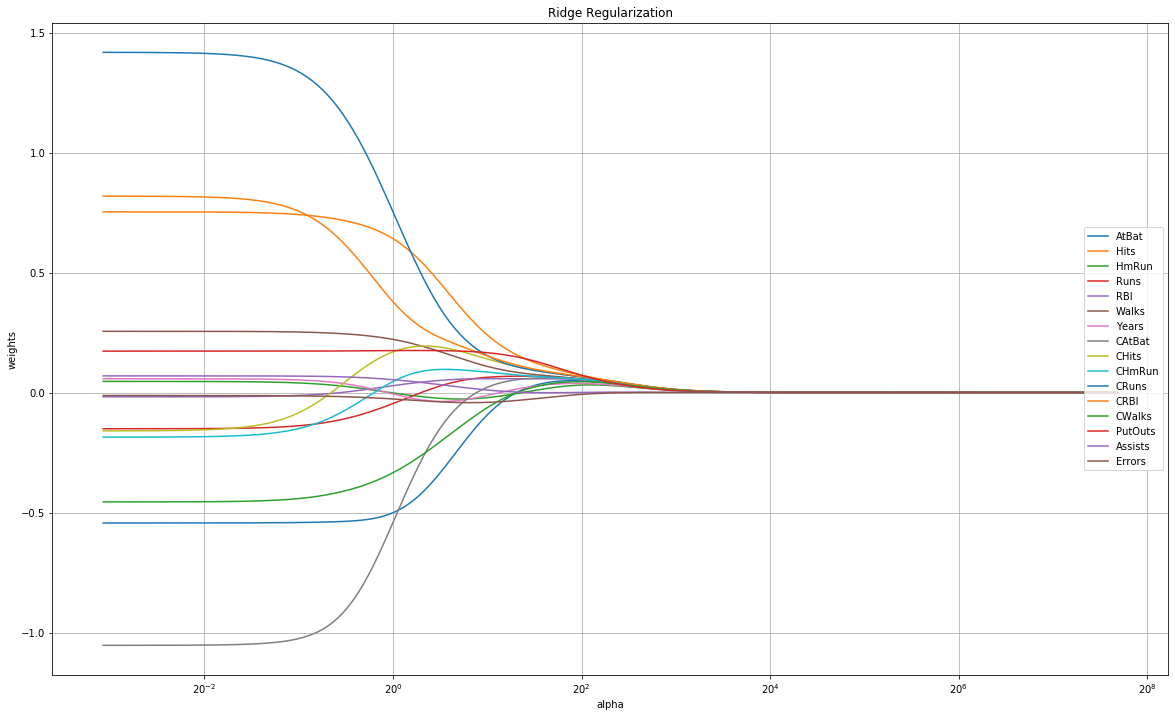

In [437]:
alphas = np.logspace(-4, 10, 200)
coeffs = np.zeros((len(alphas), X_train.shape[1]))


for n, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    
# Display results

ax = plt.gca()

ax.plot(alphas, coeffs)
ax.set_xscale('log', basex = 20)
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Regularization')
plt.axis('tight')
plt.grid(True)
plt.legend(features, loc = 'right')
fig = plt.gcf()
fig.set_size_inches(20, 12)
#fig.savefig('test2png.png', dpi=100)
plt.show()

In [441]:
# ridge cv exploration
# gridsearch 
ridge = Ridge()
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10,
                                   20, 25, 30, 50, 80, 100, 120, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [442]:
print(ridge_regressor.best_params_)

{'alpha': 120}


In [443]:
 print(ridge_regressor.best_score_)

-0.5369918616141086


In [449]:
# use mse to see the fit score for train set 
print('fit score for train set:')
fit_score_train = np.sqrt(mean_squared_error(y_train,ridge_regressor.predict(X_train)))
print(fit_score_train)
# use mse to see the fit score for test set 
print('fit score for test set:')
fit_score_test = np.sqrt(mean_squared_error(y_test,ridge_regressor.predict(X_test)))
print(fit_score_test)


fit score for train set:
0.700115068386546
fit score for test set:
0.9129106631379942


In [445]:
# use ridgecv

ridge_reg = RidgeCV(cv=10)

ridge_reg .fit(X_train, y_train)



RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [447]:
ridge_reg.alpha_

10.0

# Answer:

## By setting the cv as 10, the model fits, predicts and automatically generates the optimal penalty , which is 10.

## the gridsearch shows that the alpha is 120.

In [448]:
# use mse to see the fit score for train set 
print('fit score for train set:')
fit_score_train = np.sqrt(mean_squared_error(y_train,ridge_reg.predict(X_train)))
print(fit_score_train)
# use mse to see the fit score for test set 
print('fit score for test set:')
fit_score_test = np.sqrt(mean_squared_error(y_test,ridge_reg.predict(X_test)))
print(fit_score_test)


fit score for train set:
0.6752419950628994
fit score for test set:
0.8880881057547727


# Answer

## Q: Explain in your own words the bias-variance tradeoff.  

## A: High bias in the algorithm implies that the data are quite scattered. Then the algorithm is probable to to loose the relevant relation between features and target values, namely high bias could cause underfitting. In contrast, high variance could make the algorithm to model even the noise in the training data, which is, contributing to an overfitting situation. So if the bias is high, then we could loose the connection between inputs and outputs, but if the variance is high, then we could have the problem of overfitting. 

## What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

## A: Before lasso and ridge are used, I could see that just with the linear regression function, the MSE of the training data is and the testing data is -0.566 and -1.149 respectively.  And the difference between two values is 0.583. The absolute value of the MSE of the testing data is higher than that of the training data.  This implies that there is an overfitting problem here. After using ridge and lasso, the difference between the two MSE values shrinks. For example, for the lasso situation, the MSE for the training data and testing data are 0.703 and 0.892, the difference is 0.19 in this case. This implies that the regulation helps to solve the over fitting problem. They will penalize the model when it starts to overfit. 

